### Line Chart

**notebook setup:**

- Plot  S&P 500 price on a line chart
    - S&P 500 (^GSPC): data/^GSPC.csv

- color palette:
    - the palette is downloaded from [adobe](https://color.adobe.com/)
    - colors

   
![png](img/color_palette.png)

|Hex |RGBA|HSLA|
| ------------ | ------------ | ------------ |
|#8C4660        |rgba(140,70,95, 1)   |hsla(337, 33, 41, 1)|
|#7988D9        |rgba(121,135,216, 1)|hsla(230, 55, 66, 1)|
|#252940        |rgba(36,40,63, 1)|hsla(230, 26, 19, 1)|
|#54628C        |rgba(84,98,140, 1)|hsla(225, 25, 44, 1)|
|#F2AEAE        |rgba(242,174,174, 1)|hsla(0, 72, 81, 1)|
    
    
**caution:**

 - it will take a long time to plot data with more than 5k samples (i.e. rows)
    
    
**reference:**

1. [top 50 matplotlib visualizations the master plots python](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#35.-Time-Series-Plot)
1. [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html?highlight=title#matplotlib.pyplot.title)
    

In [1]:
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('matplotlib version: ', mpl.__version__)
print('seaborn version: ', sns.__version__)

pandas version:  1.3.4
numpy version:  1.21.4
matplotlib version:  3.5.0
seaborn version:  0.11.2


In [3]:
df=pd.read_csv('data/^GSPC.csv', sep='|')

In [4]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18111 entries, 0 to 18110
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18111 non-null  object 
 1   Open          18111 non-null  float64
 2   High          18111 non-null  float64
 3   Low           18111 non-null  float64
 4   Close         18111 non-null  float64
 5   Volume        18111 non-null  int64  
 6   Dividends     18111 non-null  int64  
 7   Stock Splits  18111 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.1+ MB


In [6]:
df=df.loc[df['Date']>='2010-01-01', ['Date', 'Close']].copy(deep=True)
df.shape

(3014, 2)

In [7]:
df.head(2)

,Date,Close
15097,2010-01-04,1132.98999
15098,2010-01-05,1136.52002


In [8]:
df.reset_index(inplace=True)

**the following illustrates how to plot a line chart with customized labels**

![png](img/line_chart1.png)

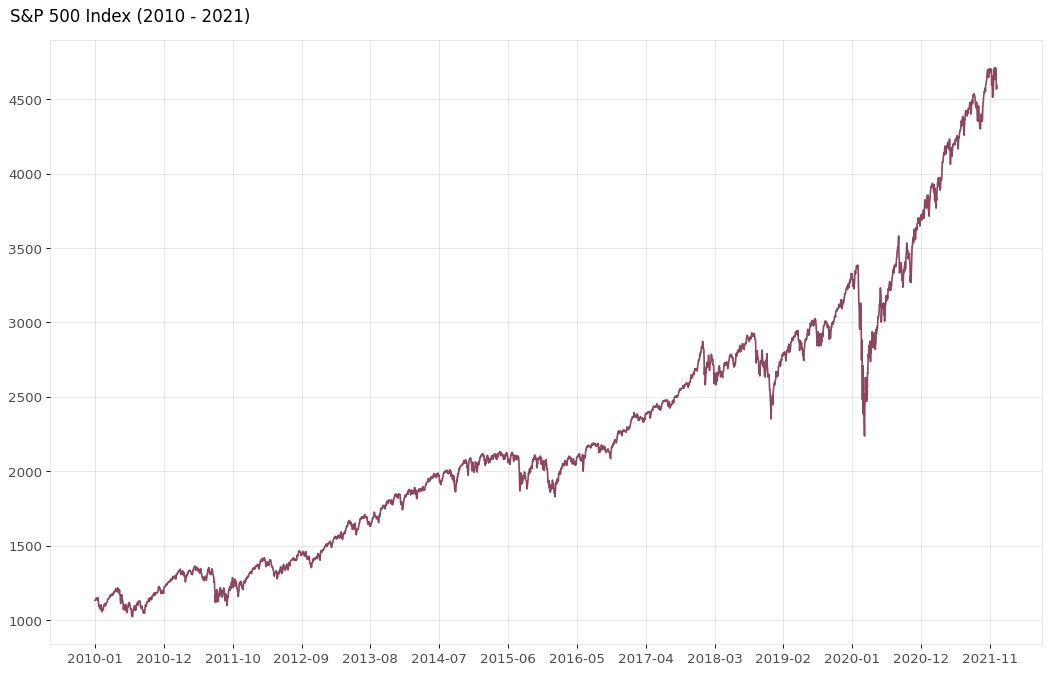

In [9]:
# the main part
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('Date', 'Close', data=df, color='#8C4660')


# pretty up the graph
xtick_location = df.index.tolist()[::230]
xtick_labels = [x[:7] for x in df['Date'].tolist()[::230]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("S&P 500 Index (2010 - 2021)", fontsize=15, loc='left', y=1.02, x=-0.04)
plt.grid(axis='both', alpha=.3)

# remove borders
plt.gca().spines["top"].set_alpha(0.1)    
plt.gca().spines["bottom"].set_alpha(0.1)
plt.gca().spines["right"].set_alpha(0.1)    
plt.gca().spines["left"].set_alpha(0.1)    

plt.show()

**the following illustrates how to add titles to x-axis and y-axis**

![png](img/line_chart2.png)

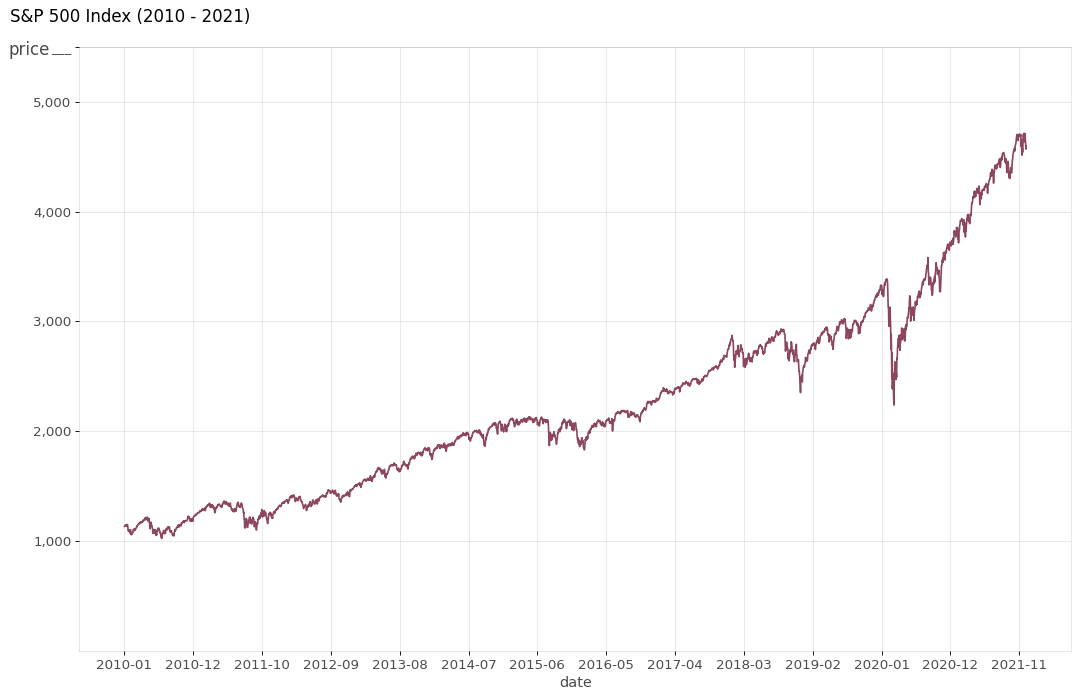

In [10]:
# the main part
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('Date', 'Close', data=df, color='#8C4660')


# pretty up the graph

#setup x-ticks
xtick_location = df.index.tolist()[::230]
xtick_labels = [x[:7] for x in df['Date'].tolist()[::230]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)

#setup y-ticks
plt.ylim(0, 5500)
ytick_location = [1000, 2000, 3000, 4000, 5000, 5500]
ytick_labels = ['1,000', '2,000', '3,000', '4,000', '5,000', '___' ]
plt.yticks(ticks=ytick_location,labels=ytick_labels,  fontsize=12, alpha=.7)

#setup x-label, y-label, title
plt.xlabel('date', loc='center', fontsize=13, alpha=.7, y=-0.1)
plt.ylabel('price', rotation=0, fontsize=15, alpha=.7, y=0.98, x=0.1)
plt.title("S&P 500 Index (2010 - 2021)", fontsize=15, loc='left', y=1.03, x=-0.07)


# setup grid and borders
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.1)    
plt.gca().spines["bottom"].set_alpha(0.1)
plt.gca().spines["right"].set_alpha(0.1)    
plt.gca().spines["left"].set_alpha(0.1)   

plt.show()